# Assignment 3
Here we compute the main moments and cumulants of the uniform distribution function. We then verify the results of the central limit theorem, by looking at the sampling distribution of the means. 

Import useful modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The only parameter that characterize the uniform distribution it's its width. Here we assume that the left edge of the distribution is in zero

In [2]:
a=2.

We can generate a plot to visualize the uniform distribution function (u(x) vs. x)

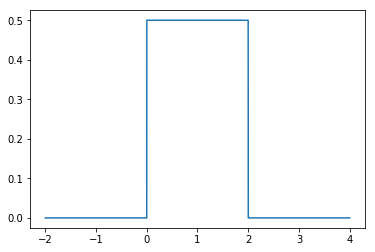

In [26]:
npoints=10000
dx=3*a/npoints
x = np.linspace(-a,2.*a,npoints) # this is a chunk of the real axis that contains the probability density function
u = (x>=0)*(x<a)/a # this is the uniform distribution function, the first two terms are meant to return 0 outside of the domain
plt.plot(x,u)
plt.show()

In order to compute the m-th moment of the distributions, we need to multiply by $x^m$ and integrate. In the numerical world, a simple way of computing an integral is to sum over discretized points and multiply by dx, i.e. we compute the area of the rectangles (there are better techniques, but this is very quick to implement).

In [37]:
moment0=np.sum(u*x**0)*dx # note the elevation to exponent is done with **
moment1=np.sum(u*x**1)*dx
moment2=np.sum(u*x**2)*dx
print('0-th moment = {:.2f}'.format(moment0)) 
print('1-st moment = {:.2f}'.format(moment1))
print('2-nd moment = {:.5f}'.format(moment2))

0-th moment = 1.00
1-st moment = 1.00
2-nd moment = 1.33260


Using the np.random.uniform() function we can generate a sample of n points that follow the uniform probability density function.

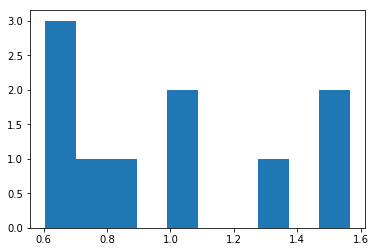

In [7]:
n=10
sample=np.random.uniform(0.0,a,size=n)
plt.hist(sample)
plt.show()

For this sample we can compute the mean, variance, and standard deviation still using numpy functions. Are these results consistent with your calculations of the moments?

In [195]:
print(np.average(sample),np.var(sample),np.std(sample))

0.8968164997490842 0.4320942200494233 0.6573387407185304


If we generate a large number of samples and collect their averages, we can analyze the sampling distribution of the means and verify the results of the central limit theorem

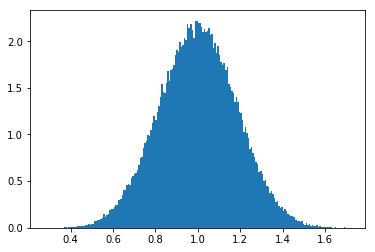

In [188]:
n=10
n_samples=100000
n_bins=200
means=np.zeros(n_samples)
for i in np.arange(n_samples):
    sample=np.random.uniform(0,a,size=n)
    means[i]=np.average(sample)
plt.hist(means,density=True,bins=n_bins)
plt.show()

We expect the above distribution to look like a Gaussian, centered on the mean of the probability density function, and with a spread given by the standard deviation of the probability density function divided by $\sqrt{n}$

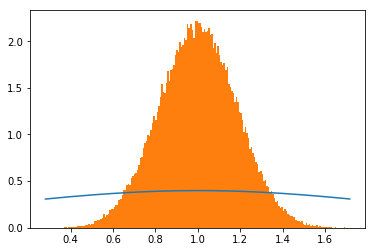

In [196]:
mu_expected=1. # plug the correct value
sigma_expected=1 # plug the correct value
x=np.linspace(np.min(means),np.max(means),n_bins)
gaussian=1/np.sqrt(2*np.pi)/sigma_expected*np.exp(-(x-mu_expected)**2/2/sigma_expected**2)
plt.plot(x,gaussian)
plt.hist(means,density=True,bins=n_bins)
plt.show()